<a href="https://colab.research.google.com/github/prarthantalwar/Image-Segmentation-Using-GMMs/blob/main/image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Note: Upload images.zip file before running the code**

In [ ]:
# installig hmmlearn
!pip install hmmlearn

y
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.mixture import GaussianMixture as GMM
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import rand_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import homogeneity_score
from google.colab.patches import cv2_imshow
import hmmlearn
from hmmlearn import hmm

In [ ]:
# installing fuzzy-c-means
!pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# get images from the zip file
!unzip ./images.zip

Archive:  ./images.zip
replace images/106025.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: images/106025.jpg       
replace images/22090.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: images/22090.jpg        
replace images/24063.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: images/24063.jpg        
replace images/253036.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: images/253036.jpg       
replace images/302003.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: images/302003.jpg       
replace images/61086.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: images/61086.jpg        
replace images/78019.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: images/78019.jpg        


In [ ]:
# reading the image and converting into grey scale
img = cv2.imread("images/22090.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
org_data = np.asarray(gray)
print(org_data.shape)
mod_data = np.reshape(org_data,(-1,1))
print(mod_data.shape)

(321, 481)
(154401, 1)


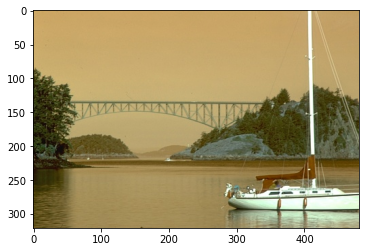

In [ ]:
# plotting the RGB image
plt.imshow(img)
plt.show()

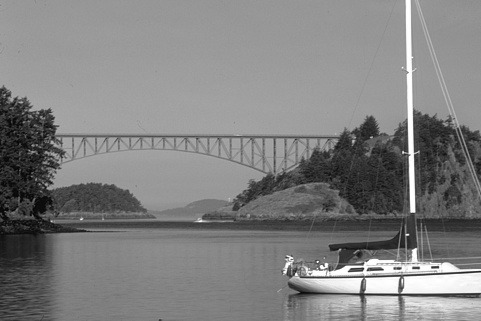

In [ ]:
# plotting the grey scale image
cv2_imshow(gray)
plt.show()

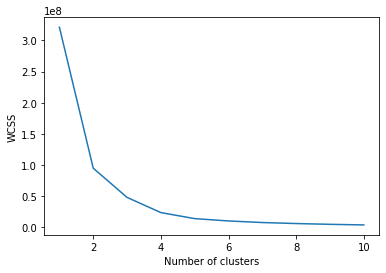

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd 
import sklearn
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(mod_data) 
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [ ]:
# HMM model implmentation
%%timeit -n5 -r5
model = hmm.GaussianHMM(n_components=3,covariance_type="tied")
model.fit(mod_data)
hmm_labels = model.predict(mod_data)
hmm_segmented = hmm_labels.reshape(org_data.shape[0],org_data.shape[1])

3.18 s ± 915 ms per loop (mean ± std. dev. of 5 runs, 5 loops each)


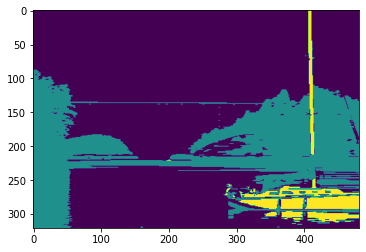

0.3759799733142117
0.7165354836502589


In [ ]:
# evaluating the HMM model
plt.imshow(hmm_segmented)
plt.show()
print(davies_bouldin_score(mod_data, hmm_labels))
print(silhouette_score(mod_data, hmm_labels))

In [ ]:
# GMM model implmentation
# %%timeit -n5 -r5
gmm = GMM(n_components = 3,covariance_type = "tied")
gmm.fit(mod_data)
gmm_labels = gmm.predict(mod_data)
gmm_segmented = gmm_labels.reshape(org_data.shape[0],org_data.shape[1])


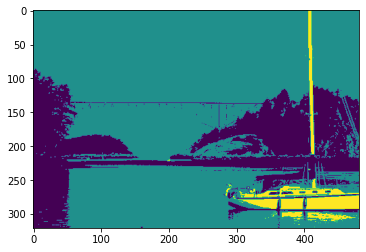

0.3394594870889504


In [ ]:
# evaluating the GMM model
plt.imshow(gmm_segmented)
plt.show()

print(davies_bouldin_score(mod_data, gmm_labels))
# print(silhouette_score(mod_data, gmm_labels))



In [ ]:
# Kmeans model implementation
# %%timeit -n5 -r5
kmeans = KMeans(n_clusters = 3)
kmeans.fit(mod_data)
kmeans_labels = kmeans.predict(mod_data)
kmeans_segmented = kmeans_labels.reshape(org_data.shape[0], org_data.shape[1])


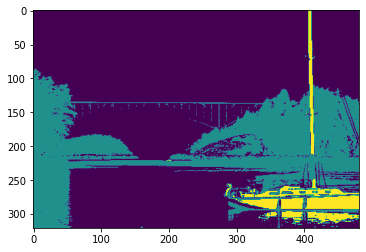

0.369444037246134


In [ ]:
# evaluating the Kmeans model
plt.imshow(kmeans_segmented)
plt.show()

print(davies_bouldin_score(mod_data, kmeans_labels))
#print(silhouette_score(mod_data, kmeans_labels))

In [ ]:
# Fuzzy KMeans
# %%timeit -n5 -r5
from fcmeans import FCM
fcm_model = FCM(n_clusters=3) 
fcm_model.fit(mod_data)
fcm_model_labels = fcm_model.predict(mod_data)
fcm_segmented = fcm_model_labels.reshape(org_data.shape[0], org_data.shape[1])

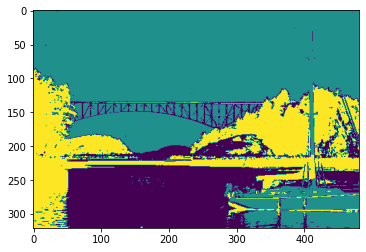

0.5286719939817621


In [ ]:
# evaluating the Fuzzy KMeans
plt.imshow(fcm_segmented)
plt.show()

print(davies_bouldin_score(mod_data, fcm_model_labels))
#print(silhouette_score(mod_data, fcm_model_labels))